### Imports

In [ ]:
import nltk
import string
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

### Article

In [ ]:
article = '''Tourism Minister Olga Kefalogianni this week presented four actions to strengthen integrated and sustainable tourism development, with a total budget of 387.24 million euros, financed by the National Recovery and Resilience Plan.

  These four actions are the promotion of the sustainability of destinations, the differentiation and improvement of the competitiveness of the Greek tourism product, the upgrading of tourism education and training, and the strengthening of the promotion of the Greek tourism product with a new approach and the use of new tools.

  Four main projects are already under way. These concern the upgrading of tourism ports, the upgrading of ski and mountain lodge facilities, and the improvement of beach accessibility. These actions have a total budget of €222 million.

  However, the biggest project the ministry is running concerns tourism ports and the upgrading of their infrastructure, with the aim of meeting the increased market demand and maintaining the competitiveness of the tourism product internationally, with a particular emphasis on decarbonization, in protecting the environment and achieving energy efficiency.


  Its budget amounts to €159.2 million and the beneficiaries include tourism ports for pleasure boats – i.e. tourism port infrastructures and facilities governed by the provisions of Law 2160/93, at marinas, shelters and moorings, regardless of the time and status of their creation. The deadline for submitting funding applications is December 27 and the maximum per investment project for marinas has been set at €10 million, for shelters at €6 million and for moorings at €3 million.

  Another important group of projects, with a total public expenditure budget of €53.7 million, is the upgrading of ski center facilities, as well as public expenditure budget projects of €17.1 million for the improvement and modification of accessibility to Greek beaches.

  As far as tourism education is concerned, state funds of €45.153 million have been secured, plus €10.13 million for the digital transformation of the register of tourism businesses. The ministry’s projects also include a destination management project. Another €10 million is scheduled for the digital transformation of the Greek National Tourism Organization.
'''

### Tokenization

Sentence tokens

In [ ]:
nltk.sent_tokenize(article)

['Tourism Minister Olga Kefalogianni this week presented four actions to strengthen integrated and sustainable tourism development, with a total budget of 387.24 million euros, financed by the National Recovery and Resilience Plan.',
 'These four actions are the promotion of the sustainability of destinations, the differentiation and improvement of the competitiveness of the Greek tourism product, the upgrading of tourism education and training, and the strengthening of the promotion of the Greek tourism product with a new approach and the use of new tools.',
 'Four main projects are already under way.',
 'These concern the upgrading of tourism ports, the upgrading of ski and mountain lodge facilities, and the improvement of beach accessibility.',
 'These actions have a total budget of €222 million.',
 'However, the biggest project the ministry is running concerns tourism ports and the upgrading of their infrastructure, with the aim of meeting the increased market demand and maintainin

Word tokens

In [ ]:
nltk.word_tokenize(article.lower())

['tourism',
 'minister',
 'olga',
 'kefalogianni',
 'this',
 'week',
 'presented',
 'four',
 'actions',
 'to',
 'strengthen',
 'integrated',
 'and',
 'sustainable',
 'tourism',
 'development',
 ',',
 'with',
 'a',
 'total',
 'budget',
 'of',
 '387.24',
 'million',
 'euros',
 ',',
 'financed',
 'by',
 'the',
 'national',
 'recovery',
 'and',
 'resilience',
 'plan',
 '.',
 'these',
 'four',
 'actions',
 'are',
 'the',
 'promotion',
 'of',
 'the',
 'sustainability',
 'of',
 'destinations',
 ',',
 'the',
 'differentiation',
 'and',
 'improvement',
 'of',
 'the',
 'competitiveness',
 'of',
 'the',
 'greek',
 'tourism',
 'product',
 ',',
 'the',
 'upgrading',
 'of',
 'tourism',
 'education',
 'and',
 'training',
 ',',
 'and',
 'the',
 'strengthening',
 'of',
 'the',
 'promotion',
 'of',
 'the',
 'greek',
 'tourism',
 'product',
 'with',
 'a',
 'new',
 'approach',
 'and',
 'the',
 'use',
 'of',
 'new',
 'tools',
 '.',
 'four',
 'main',
 'projects',
 'are',
 'already',
 'under',
 'way',
 '.',


### Plotting word tokens counts

In [ ]:
words = [word for word in nltk.word_tokenize(article.lower()) if word not in string.punctuation]
tmp = pd.DataFrame({'words': words}).words.value_counts()
word_counts = pd.DataFrame({'word': tmp.index, 'count': tmp.values})
word_counts

,word,count
0,the,34
1,of,28
2,and,18
3,tourism,13
4,million,11
...,...,...
154,running,1
155,biggest,1
156,however,1
157,€222,1


In [ ]:
def plot_words_frequency(word_count: pd.DataFrame, name: str = 'Word counts') -> None:
  word_count = word_count.head(20)

  ax = sns.barplot(x='count', y='word', data=word_count, color='blue')

  for index, value in enumerate(word_count['count']):
    ax.text(value, index, str(value), ha='left', va='center')

  plt.xlabel('count')
  plt.ylabel('word')
  plt.title(name)
  plt.show()

20 most freq. words

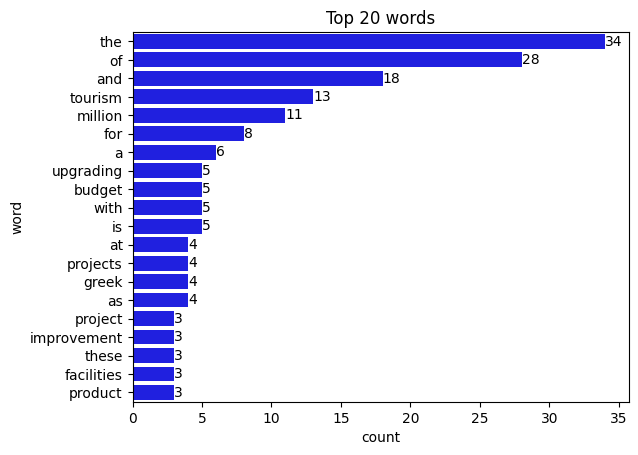

In [ ]:
plot_words_frequency(word_counts, 'Top 20 words')

20 most freq words without stop words

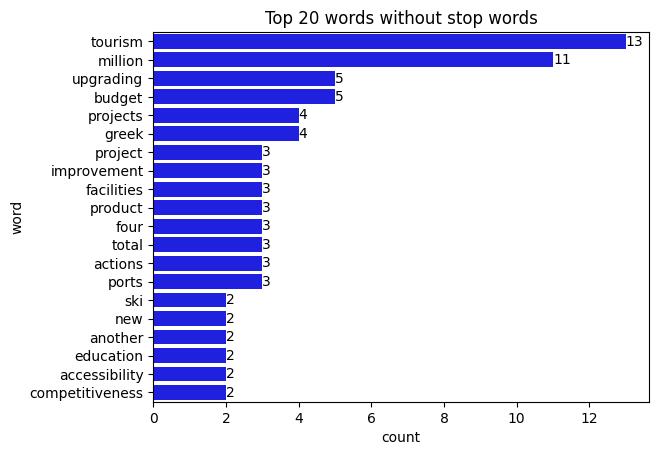

In [ ]:
stop_words = nltk.corpus.stopwords.words("english")
word_counts = word_counts[~word_counts.word.isin(stop_words)]
plot_words_frequency(word_counts, 'Top 20 words without stop words')